In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

# Data

In [4]:
student = pd.read_csv("PyTorch_CIFAR10/Histories/montecarlo/student.csv")
kd = pd.read_csv("PyTorch_CIFAR10/Histories/KD_param/KD_param_search.csv")
# montecarlo_kd_1 = pd.read_csv("PyTorch_CIFAR10/Histories/montecarlo/KD_0.1_3.0.csv")
# montecarlo_kd_2 = pd.read_csv("PyTorch_CIFAR10/Histories/montecarlo/KD_0.1_3.0_2.csv")
montecarlo_kd_ig = pd.read_csv("PyTorch_CIFAR10/Histories/montecarlo/KD_IG_0.1_3.0_2.csv")
montecarlo_kd_ig_prob = pd.read_csv("PyTorch_CIFAR10/Histories/montecarlo/KD_IG_0.1_3.0_25.csv")
montecarlo_ig = pd.read_csv("PyTorch_CIFAR10/Histories/montecarlo/IG_0.1_3.0_2.csv")
montecarlo_ig_prob = pd.read_csv("PyTorch_CIFAR10/Histories/montecarlo/IG_0.1_3_0.25.csv")

In [5]:
# montecarlo_kd = pd.concat([montecarlo_kd_1, montecarlo_kd_1], axis=0)
montecarlo_kd = pd.read_csv("PyTorch_CIFAR10/Histories/montecarlo/KD_0.1_3_second.csv")

In [6]:
# Extracting the data
alpha = np.array(kd["Alpha"])
temp = np.array(kd["Temp"])
accuracy = np.array(kd["Test Accuracy"])

In [7]:
# Find the index of the maximum accuracy
max_index = np.argmax(accuracy)

# Coordinates of the point with the highest accuracy
max_alpha = alpha[max_index]
max_temp = temp[max_index]
max_accuracy = accuracy[max_index]

In [8]:
print(max_accuracy, max_alpha, max_temp)

92.09 0.1 3.0


# 3D Plot

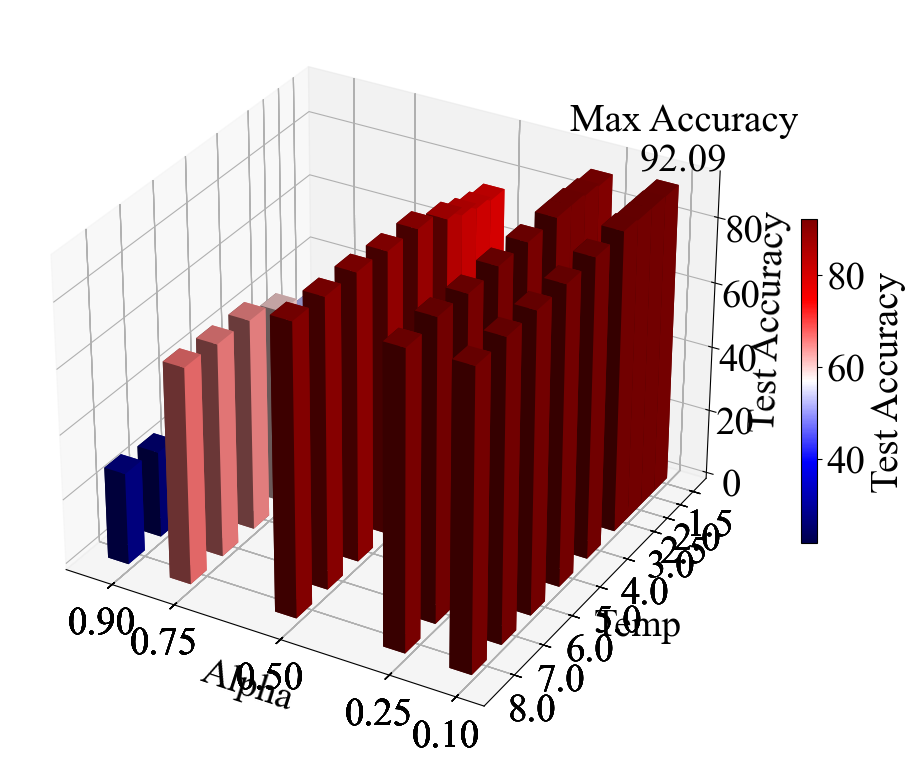

In [9]:
# Creating a 3D bar plot
fig = plt.figure(figsize=(12,28))
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on accuracy values
norm = plt.Normalize(accuracy.min(), accuracy.max())
colors = plt.cm.seismic(norm(accuracy))

# Plotting the 3D bars
ax.bar3d(alpha, temp, np.zeros_like(accuracy), 0.05, 0.5, accuracy, color=colors)

# Annotate the maximum accuracy bar
ax.text(max_alpha-0.24, max_temp+2.5, max_accuracy + 40, f"Max Accuracy\n{max_accuracy:.2f}", color='black', ha='center')

# Adjust the view angle for better visibility
ax.view_init(elev=30, azim=120)

# Adding labels
ax.set_xlabel('Alpha')
ax.set_xticks(alpha)
ax.set_ylabel('Temp')
ax.set_yticks(temp)
ax.set_zlabel('Test Accuracy')

# Add a color bar which maps values to colors
mappable = plt.cm.ScalarMappable(cmap=plt.cm.seismic, norm=norm)
mappable.set_array(accuracy)

# Create a colorbar with correct placement
cbar = fig.colorbar(mappable, ax=ax, shrink=0.15, aspect=20)
cbar.set_label('Test Accuracy')

plt.show()

In [10]:
# Unique values of Alpha and Temp
unique_alpha = np.sort(kd['Alpha'].unique())
unique_temp = np.sort(kd['Temp'].unique())

# Meshgrid for Alpha and Temp
X, Y = np.meshgrid(unique_alpha, unique_temp)

# Map Test Accuracy to the grid
accuracy_grid = np.empty(X.shape)
for i, alpha in enumerate(unique_alpha):
    for j, temp in enumerate(unique_temp):
        # Selecting the Test Accuracy value corresponding to each pair of (alpha, temp)
        accuracy_grid[j, i] = kd[(kd['Alpha'] == alpha) & (kd['Temp'] == temp)]['Test Accuracy'].values[0]

# Surface Plot

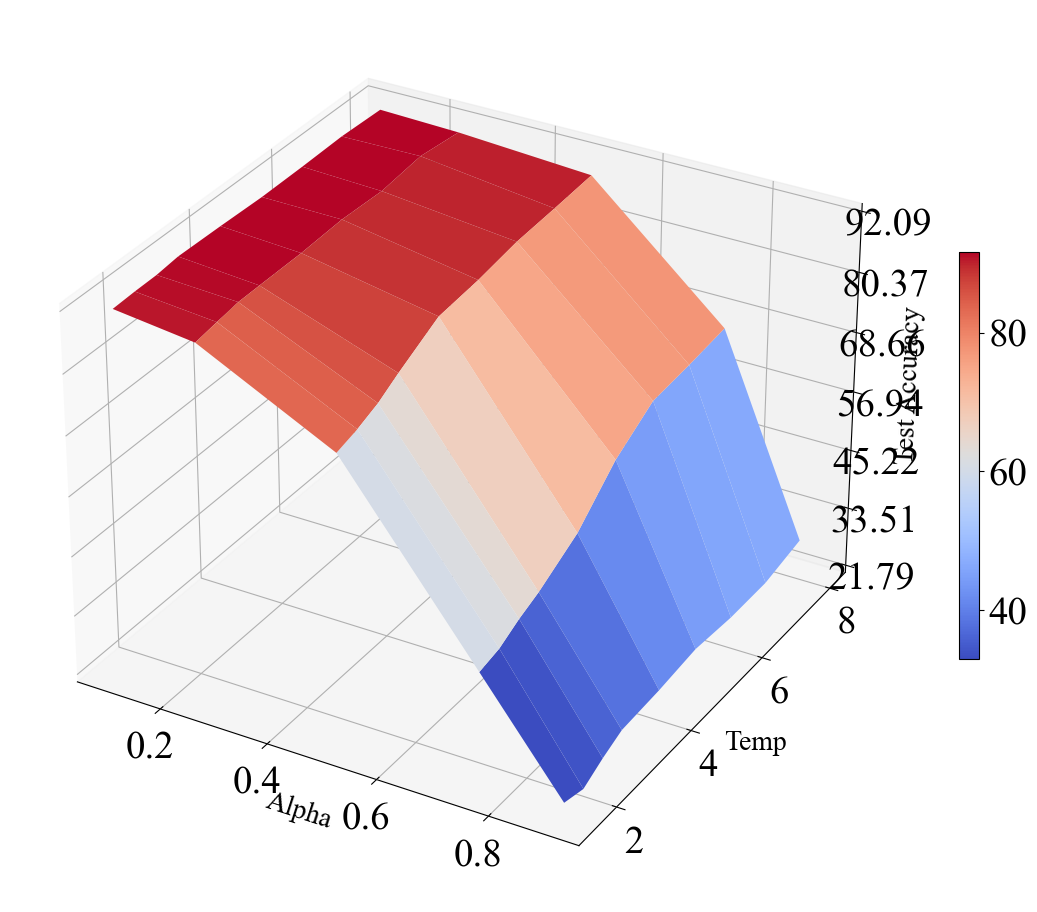

In [11]:
# Creating a 3D bar plot
fig = plt.figure(figsize=(12,28))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, accuracy_grid, cmap=cm.coolwarm, linewidth=1, antialiased=True)

# Customize the z axis.
ax.set_zlim(accuracy_grid.min(), accuracy_grid.max())
ax.zaxis.set_major_locator(LinearLocator(7))
ax.zaxis.set_major_formatter('{x:.02f}')

# Labels for axes
ax.set_xlabel('Alpha', fontsize=20)
ax.set_ylabel('Temp', fontsize=20)
ax.set_zlabel('Test Accuracy', fontsize=20)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=.15, aspect=20)
# plt.savefig('/Users/davidhernandez/Desktop/Nordling_Lab/nordlinglab-grants-publications/Article_Chang2024_integrated_gradients/sn_version_corrected/article/Figures/surface_plot.pdf')
plt.tight_layout()
plt.show()

# Distribution Plot

In [12]:
montecarlo_KD_mean = montecarlo_kd["Test Accuracy"].mean()
montecarlo_IG_mean = montecarlo_ig['Test Accuracy'].mean()
montecarlo_KD_IG_mean = montecarlo_kd_ig['Test Accuracy'].mean()
montecarlo_KD_IG_prob_mean = montecarlo_kd_ig_prob['Test Accuracy'].mean()
montecarlo_ig_prob_mean = montecarlo_ig_prob['Test Accuracy'].mean()
student_mean = student['Test Accuracy'].mean()

In [13]:
montecarlo_KD_median = montecarlo_kd["Test Accuracy"].median()
montecarlo_IG_median = montecarlo_ig['Test Accuracy'].median()
montecarlo_KD_IG_median = montecarlo_kd_ig['Test Accuracy'].median()
montecarlo_KD_IG_prob_median = montecarlo_kd_ig_prob['Test Accuracy'].median()
montecarlo_ig_prob_median = montecarlo_ig_prob['Test Accuracy'].median()
student_median = student['Test Accuracy'].median()

In [14]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

In [15]:
lilliefors(student["Test Accuracy"], dist='norm', pvalmethod='table')

(0.0609985204196421, 0.8637173581993093)

In [16]:
lilliefors(montecarlo_kd["Test Accuracy"], dist='norm', pvalmethod='table')

(0.09745929069516102, 0.20618504960622305)

In [17]:
lilliefors(montecarlo_kd_ig["Test Accuracy"], dist='norm', pvalmethod='table')

(0.0801299173205906, 0.4832186880953297)

In [18]:
lilliefors(montecarlo_kd_ig_prob["Test Accuracy"], dist='norm', pvalmethod='table')

(0.07564822223226453, 0.5760532639314528)

In [19]:
lilliefors(montecarlo_ig["Test Accuracy"], dist='norm', pvalmethod='table')

(0.10438480413480525, 0.1350487197080454)

In [20]:
lilliefors(montecarlo_ig_prob["Test Accuracy"], dist='norm', pvalmethod='table')

(0.09225245596473591, 0.2668027831981044)

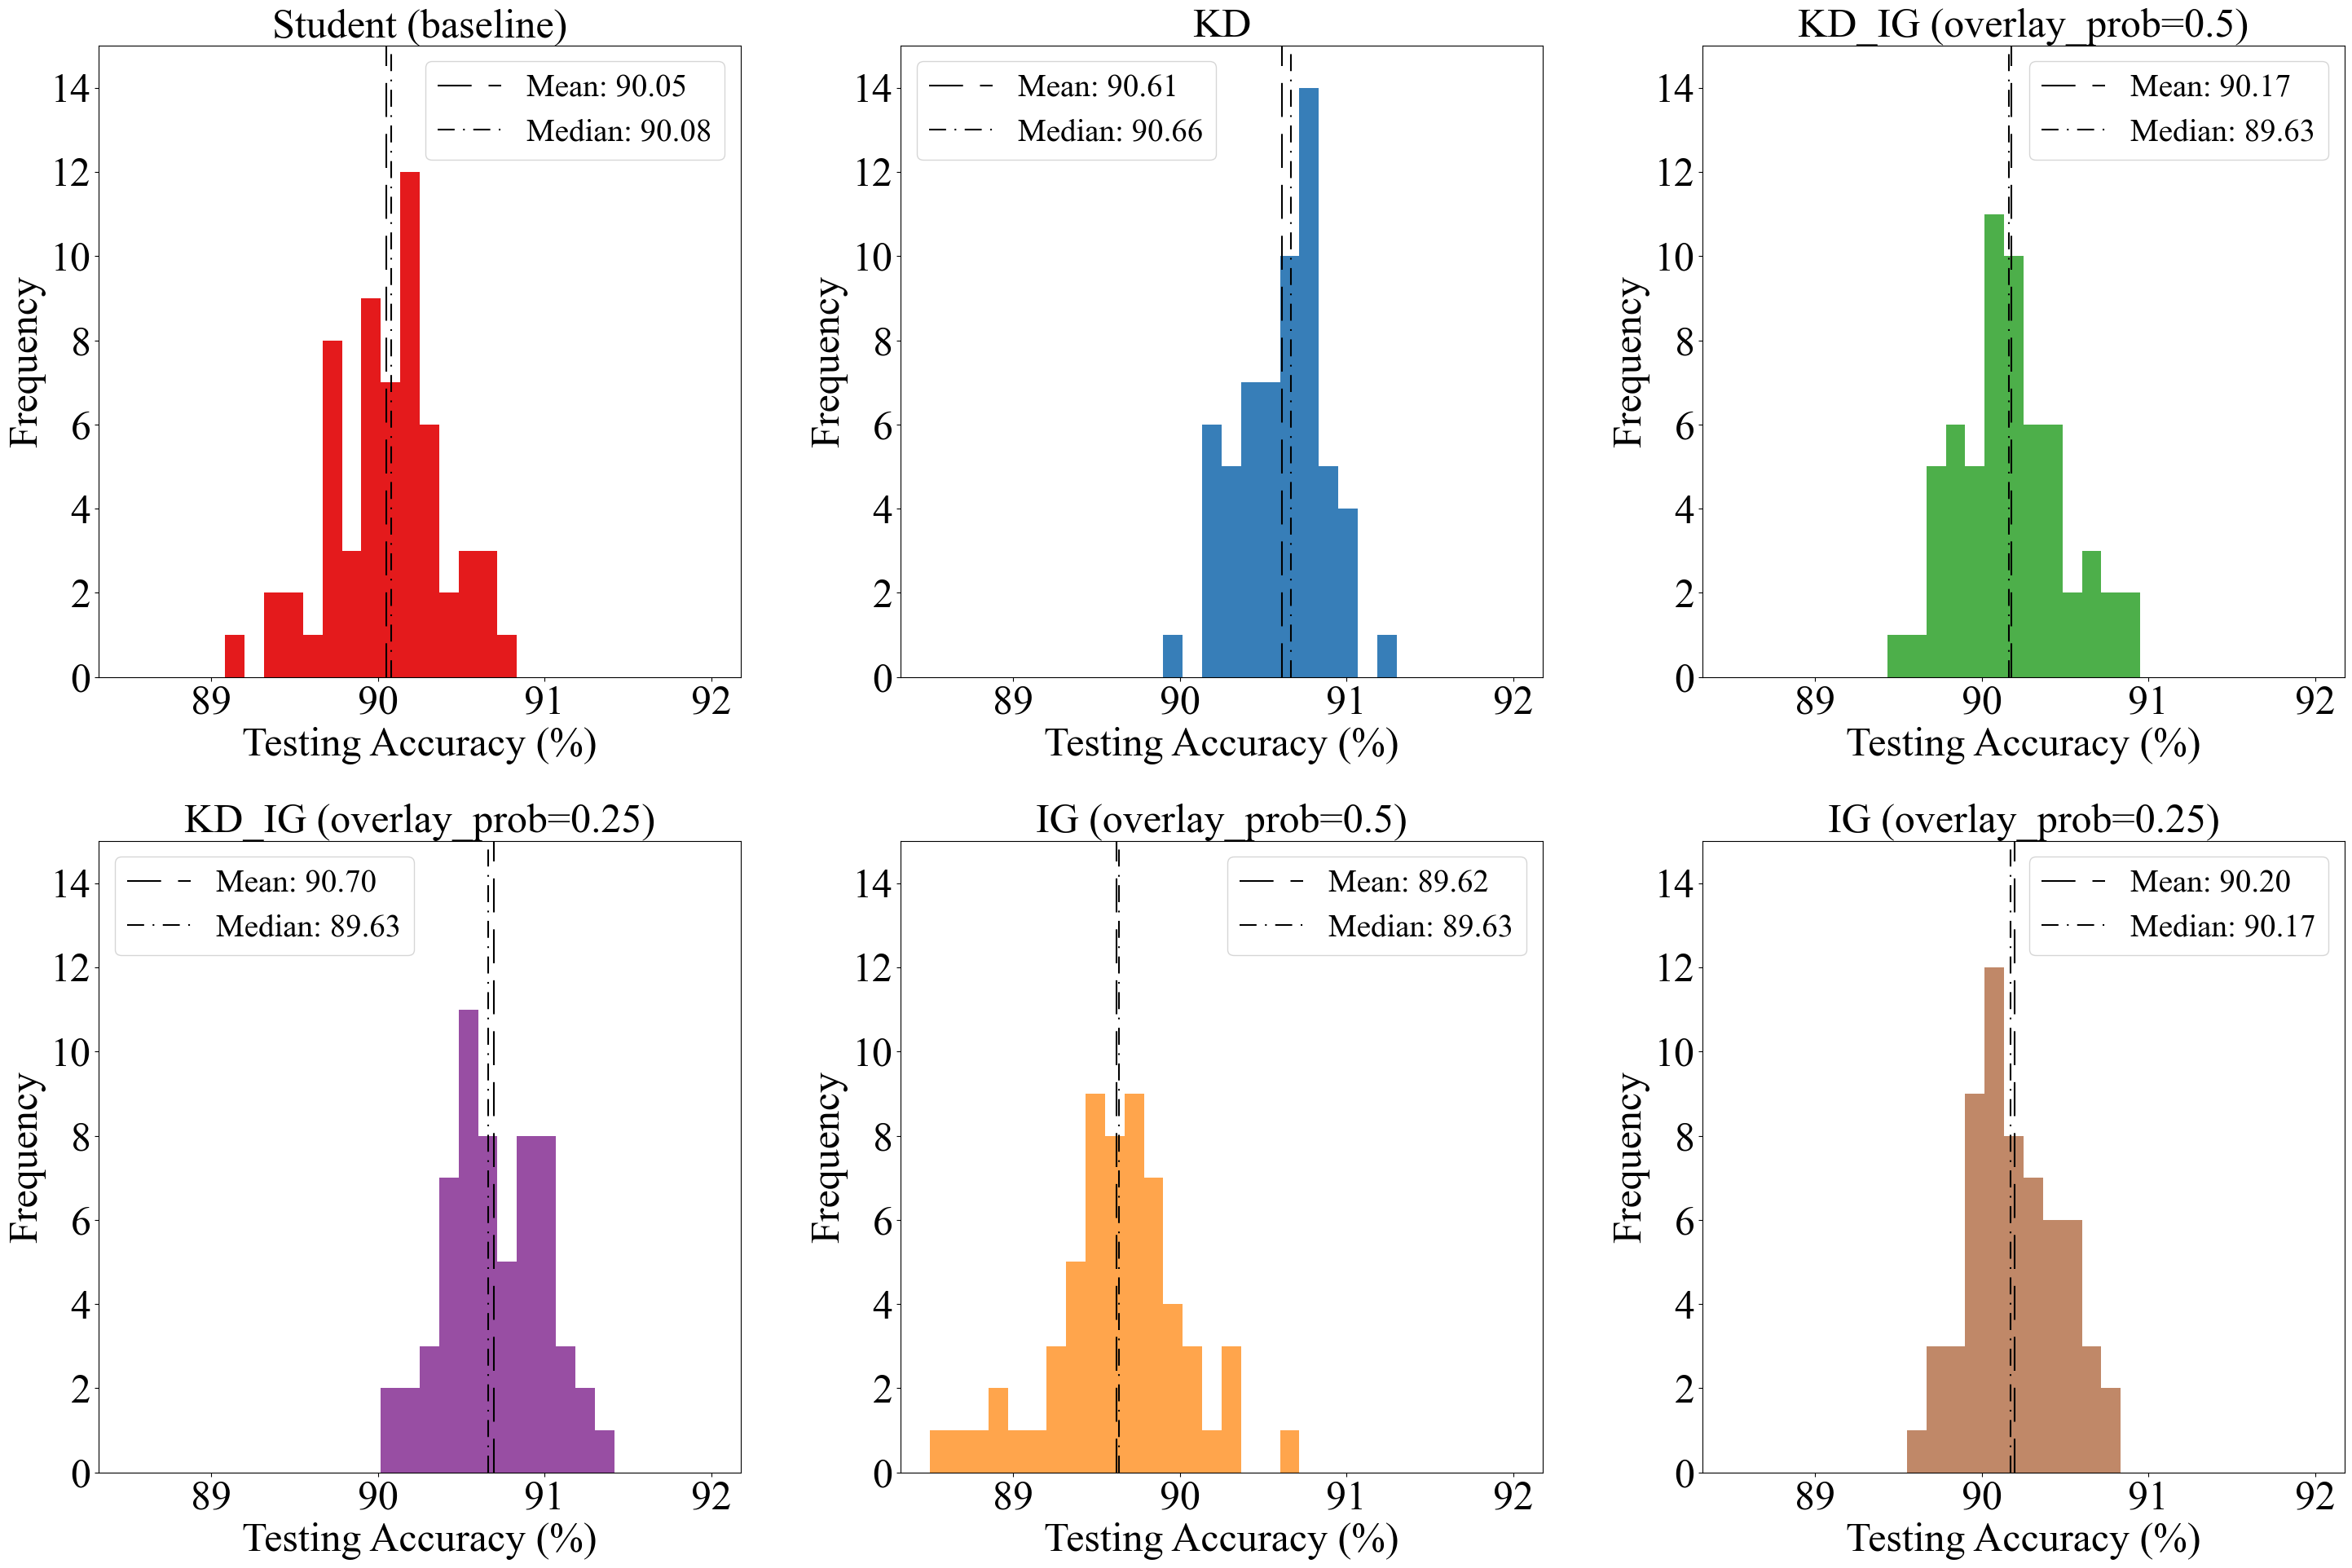

In [30]:
dash = (20, 10)
dots = ([10, 5, 1, 5])
bins = 30
range=(88.5, 92)
rows = 2
columns = 3
title_size = 36
font_size = 36
ylim = (0,15)

plt.figure(figsize=(30,20))
plt.subplot(rows,columns,1)
plt.hist(student['Test Accuracy'], bins=bins, color='#e41a1c', range=range)
plt.axvline(student_mean, color='black', linestyle='--', label=f"Mean: {student_mean:.2f}", dashes=dash)
plt.axvline(student_median, color='black', linestyle='dashdot', label=f"Median: {student_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("Student (baseline)", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,2)
plt.hist(montecarlo_kd['Test Accuracy'], bins=bins, color='#377eb8', range=range)
plt.axvline(montecarlo_KD_mean, color='black', linestyle='--', label=f"Mean: {montecarlo_KD_mean:.2f}", dashes=dash)
plt.axvline(montecarlo_KD_median, color='black', linestyle='dashdot', label=f"Median: {montecarlo_KD_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,3)
plt.hist(montecarlo_kd_ig['Test Accuracy'], bins=bins, color='#4daf4a', range=range)
plt.axvline(montecarlo_KD_IG_mean, color='black', linestyle='--', label=f"Mean: {montecarlo_KD_IG_mean:.2f}", dashes=dash)
plt.axvline(montecarlo_KD_IG_median, color='black', linestyle='dashdot', label=f"Median: {montecarlo_IG_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD_IG (overlay_prob=0.5)", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,4)
plt.hist(montecarlo_kd_ig_prob['Test Accuracy'], bins=bins, color='#984ea3', range=range)
plt.axvline(montecarlo_KD_IG_prob_mean, color='black', linestyle='--', label=f"Mean: {montecarlo_KD_IG_prob_mean:.2f}", dashes=dash)
plt.axvline(montecarlo_KD_IG_prob_median, color='black', linestyle='dashdot', label=f"Median: {montecarlo_IG_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD_IG (overlay_prob=0.25)", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,5)
plt.hist(montecarlo_ig['Test Accuracy'], bins=bins, color='#ff7f00', alpha=0.7, range=range)
plt.axvline(montecarlo_IG_mean, color='black', linestyle='--', label=f"Mean: {montecarlo_IG_mean:.2f}", dashes=dash)
plt.axvline(montecarlo_IG_median, color='black', linestyle='dashdot', label=f"Median: {montecarlo_IG_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("IG (overlay_prob=0.5)", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,6)
plt.hist(montecarlo_ig_prob['Test Accuracy'], bins=bins, color='#a65628', alpha=0.7, range=range)
plt.axvline(montecarlo_ig_prob_mean, color='black', linestyle='--', label=f"Mean: {montecarlo_ig_prob_mean:.2f}", dashes=dash)
plt.axvline(montecarlo_ig_prob_median, color='black', linestyle='dashdot', label=f"Median: {montecarlo_ig_prob_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("IG (overlay_prob=0.25)", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.tight_layout()
plt.savefig("Hernandez2024_montecarlo_subplots.pdf")
plt.show()

# Attention Maps

In [5]:
t_am = np.load("PyTorch_CIFAR10/data/cifar10_attention_maps.npy")
s_am = np.load("PyTorch_CIFAR10/data/cifar10_student_attention_maps.npy")

In [14]:
t_am.shape, s_am.shape

((50000, 8, 8), (50000, 8, 8))

/Users/davidhernandez/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/davidhernandez/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <ABE0EE74-6D97-3B8C-B690-C44754774FBC> /Users/davidhernandez/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <CDAC6E34-8608-3E70-8B2F-32BCD38E90FB> /Users/davidhernandez/anaconda3/envs/torch/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Files already downloaded and verified


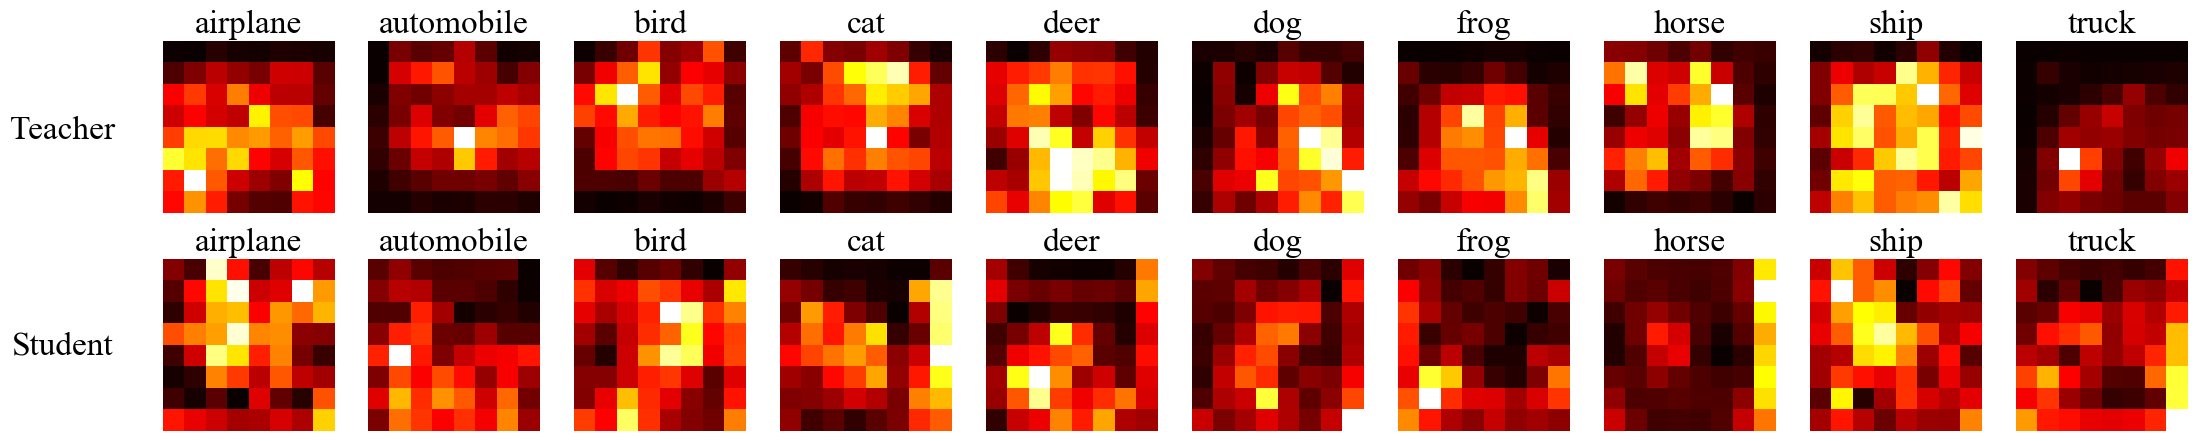

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# Define class names based on CIFAR-10 documentation
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load CIFAR-10 data
transform = transforms.Compose([transforms.ToTensor()])
cifar10_dataset = torchvision.datasets.CIFAR10(root='PyTorch_CIFAR10/data', train=True, download=True, transform=transform)
labels = np.array(cifar10_dataset.targets)  # Extract labels as numpy array

# Load attention maps
att_maps_1 = np.load("PyTorch_CIFAR10/data/cifar10_attention_maps.npy")
att_maps_2 = np.load("PyTorch_CIFAR10/data/cifar10_student_attention_maps.npy")

# Find indices for one example of each class
unique_classes = np.unique(labels)
indices = []

for cls in unique_classes:
    idx = np.where(labels == cls)[0][0]  # Get the first index of each class
    indices.append(idx)

# Define font properties for titles
title_font = {'family': 'Times New Roman', 'fontsize': 24}

# Set up the plot
fig, axs = plt.subplots(ncols=len(unique_classes), nrows=2, figsize=(25, 5))

for row, idx in enumerate(indices):
    # Plotting the first set of attention maps
    axs[0, row].imshow(att_maps_1[idx], cmap='hot', interpolation='nearest')
    axs[0, row].set_title(f'{class_names[labels[idx]]}', fontdict=title_font)
    axs[0, row].axis('off')

    # Plotting the second set of attention maps
    axs[1, row].imshow(att_maps_2[idx], cmap='hot', interpolation='nearest')
    axs[1, row].set_title(f'{class_names[labels[idx]]}', fontdict=title_font)
    axs[1, row].axis('off')

plt.subplots_adjust(left=0.09, right=0.9, top=0.9, bottom=0.1)  # Adjust the padding of the overall figure

# Adding labels to the left
fig.text(0.05, 0.71, 'Teacher', va='center', ha='center', rotation='horizontal', fontsize=24, fontfamily='Times New Roman')
fig.text(0.05, 0.28, 'Student', va='center', ha='center', rotation='horizontal', fontsize=24, fontfamily='Times New Roman')

# plt.tight_layout()
plt.savefig("attention_maps.pdf")
plt.show()

# Bar Chart

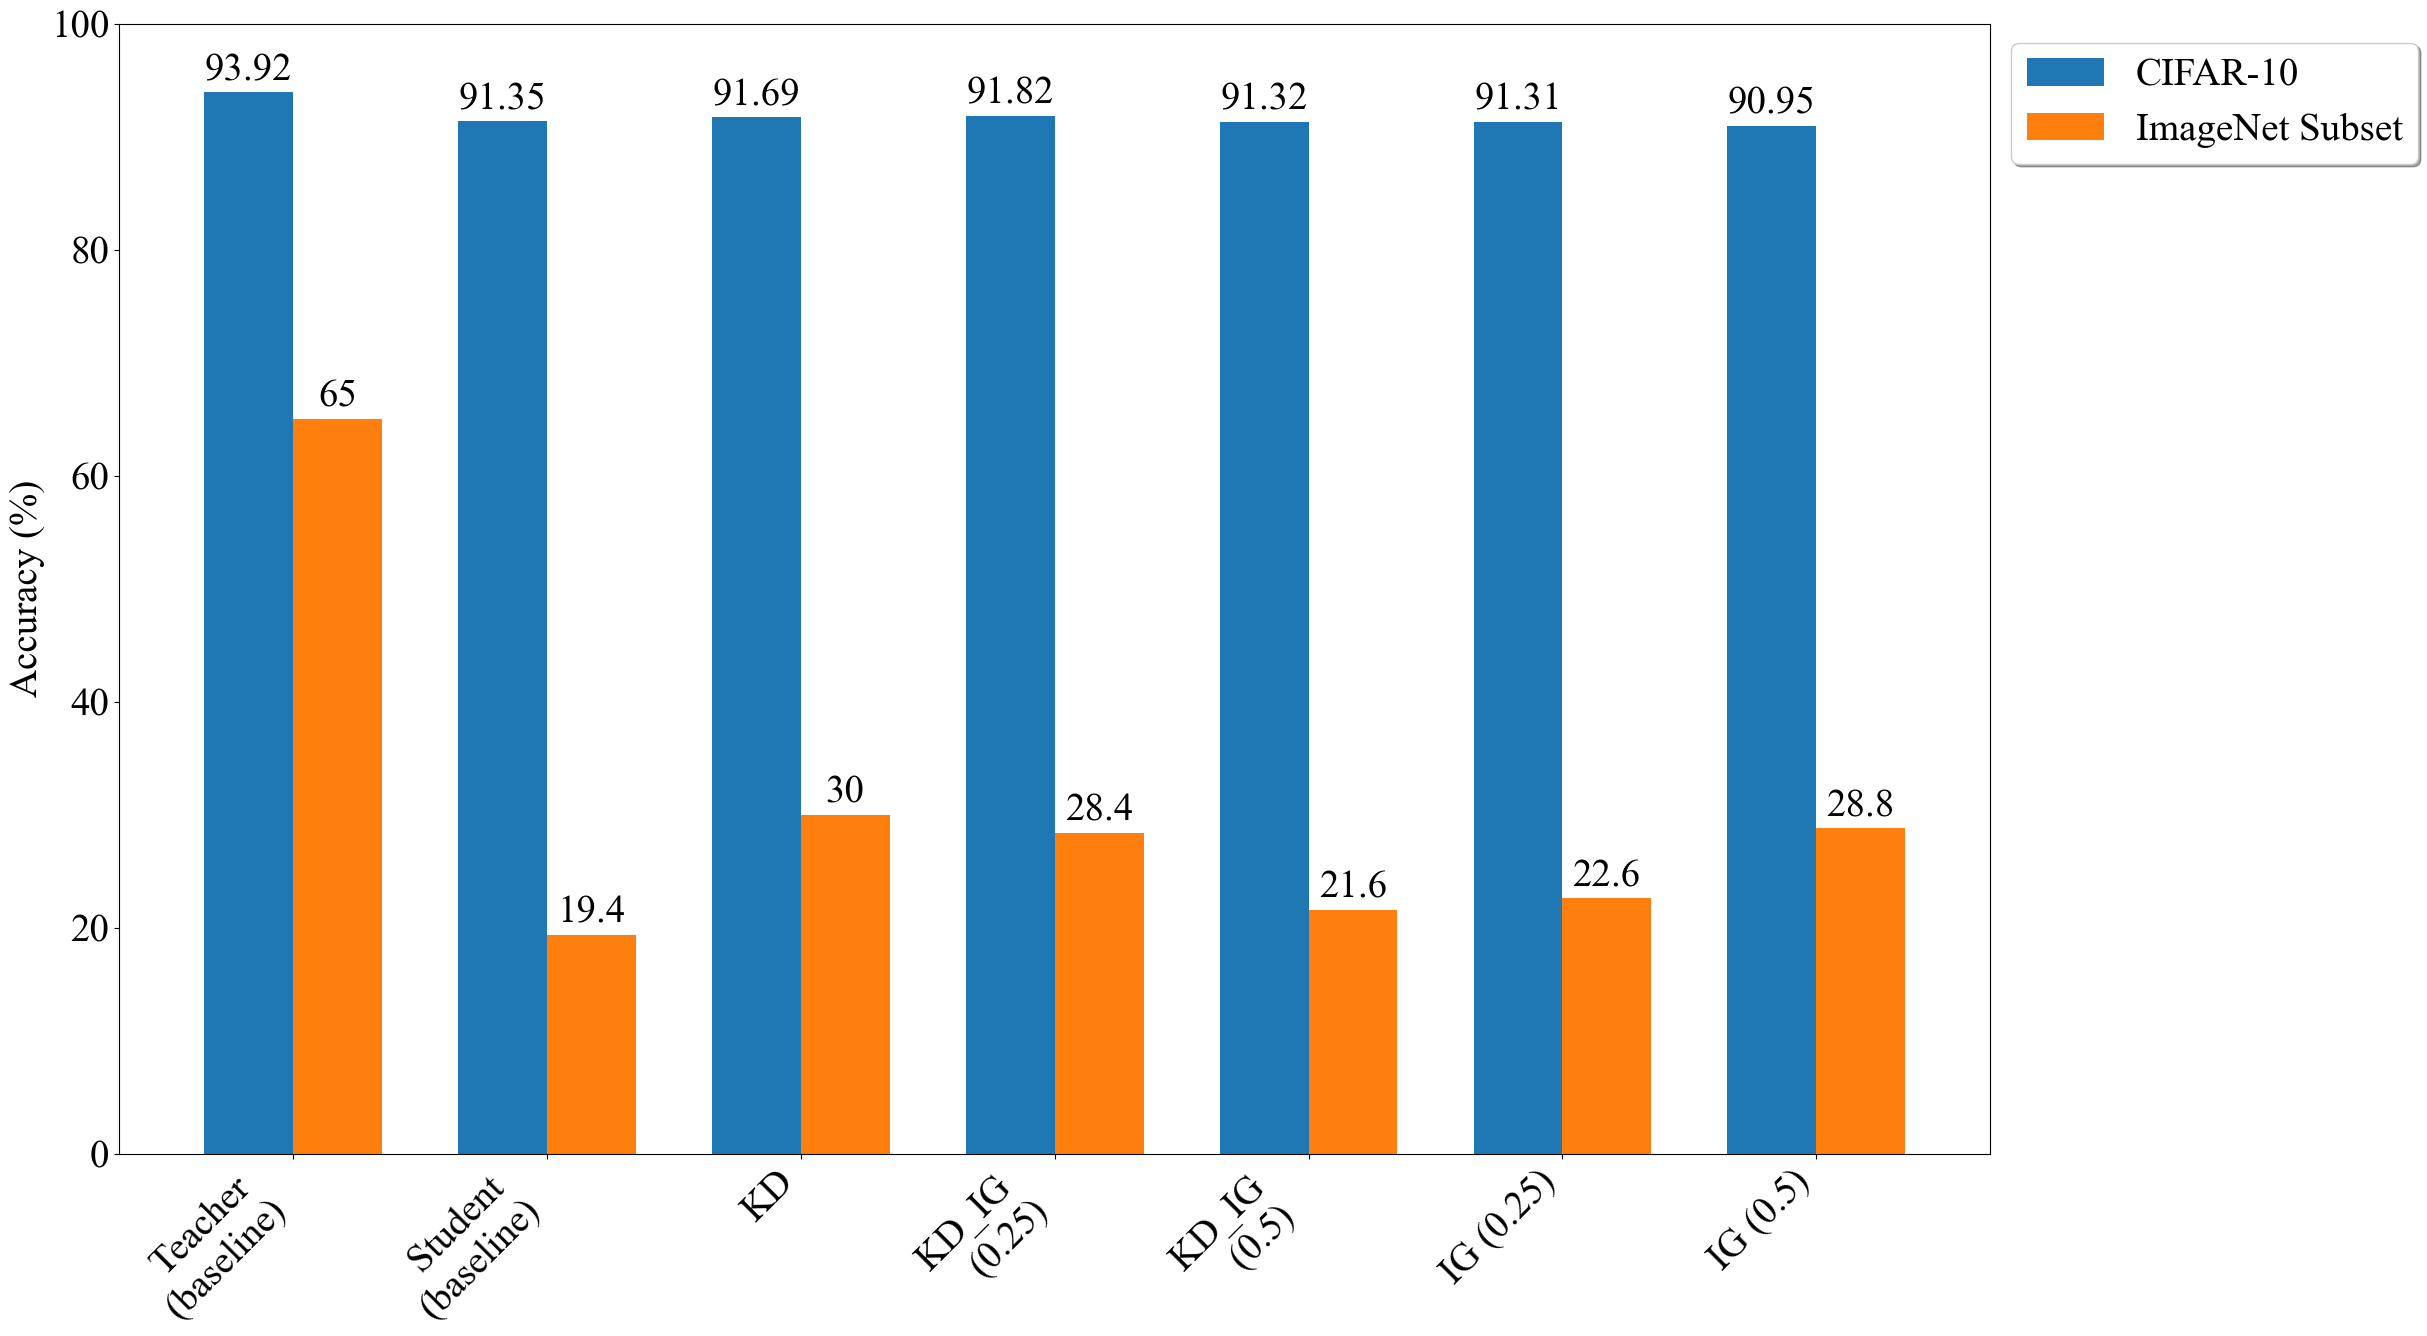

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use(r"rw_visualization.mplstyle")

# Set global font properties
plt.rcParams['font.family'] = 'serif'  # For example, 'serif', 'sans-serif', 'monospace'
plt.rcParams['font.serif'] = ['Times New Roman']  # Or another font from your system
plt.rcParams['font.size'] = 28  # You can adjust the size as needed
plt.rcParams['axes.titlesize'] = 40

# Data
models = ['Teacher \n(baseline)', 'Student \n(baseline)', 'KD', 'KD_IG \n(0.25)', 'KD_IG \n(0.5) ', 'IG (0.25)', 'IG (0.5)']
cifar_10 = [93.92, 91.35, 91.69, 91.82, 91.32, 91.31, 90.95]
imagenet = [65.00, 19.40, 30.00, 28.40, 21.60, 22.60, 28.80]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(25,14))
rects1 = ax.bar(x - width/2, cifar_10, width, label='CIFAR-10')
rects2 = ax.bar(x + width/2, imagenet, width, label='ImageNet Subset')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
# ax.set_title('Model Performance on CIFAR-10 and ImageNet Subset')
ax.set_ylim(0,100)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend(loc='upper center', bbox_to_anchor=(1.12, 1),
          fancybox=True, shadow=True, ncol=1)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig("Imagenet_bar_chart.pdf")
plt.show()


# CF vs ACC

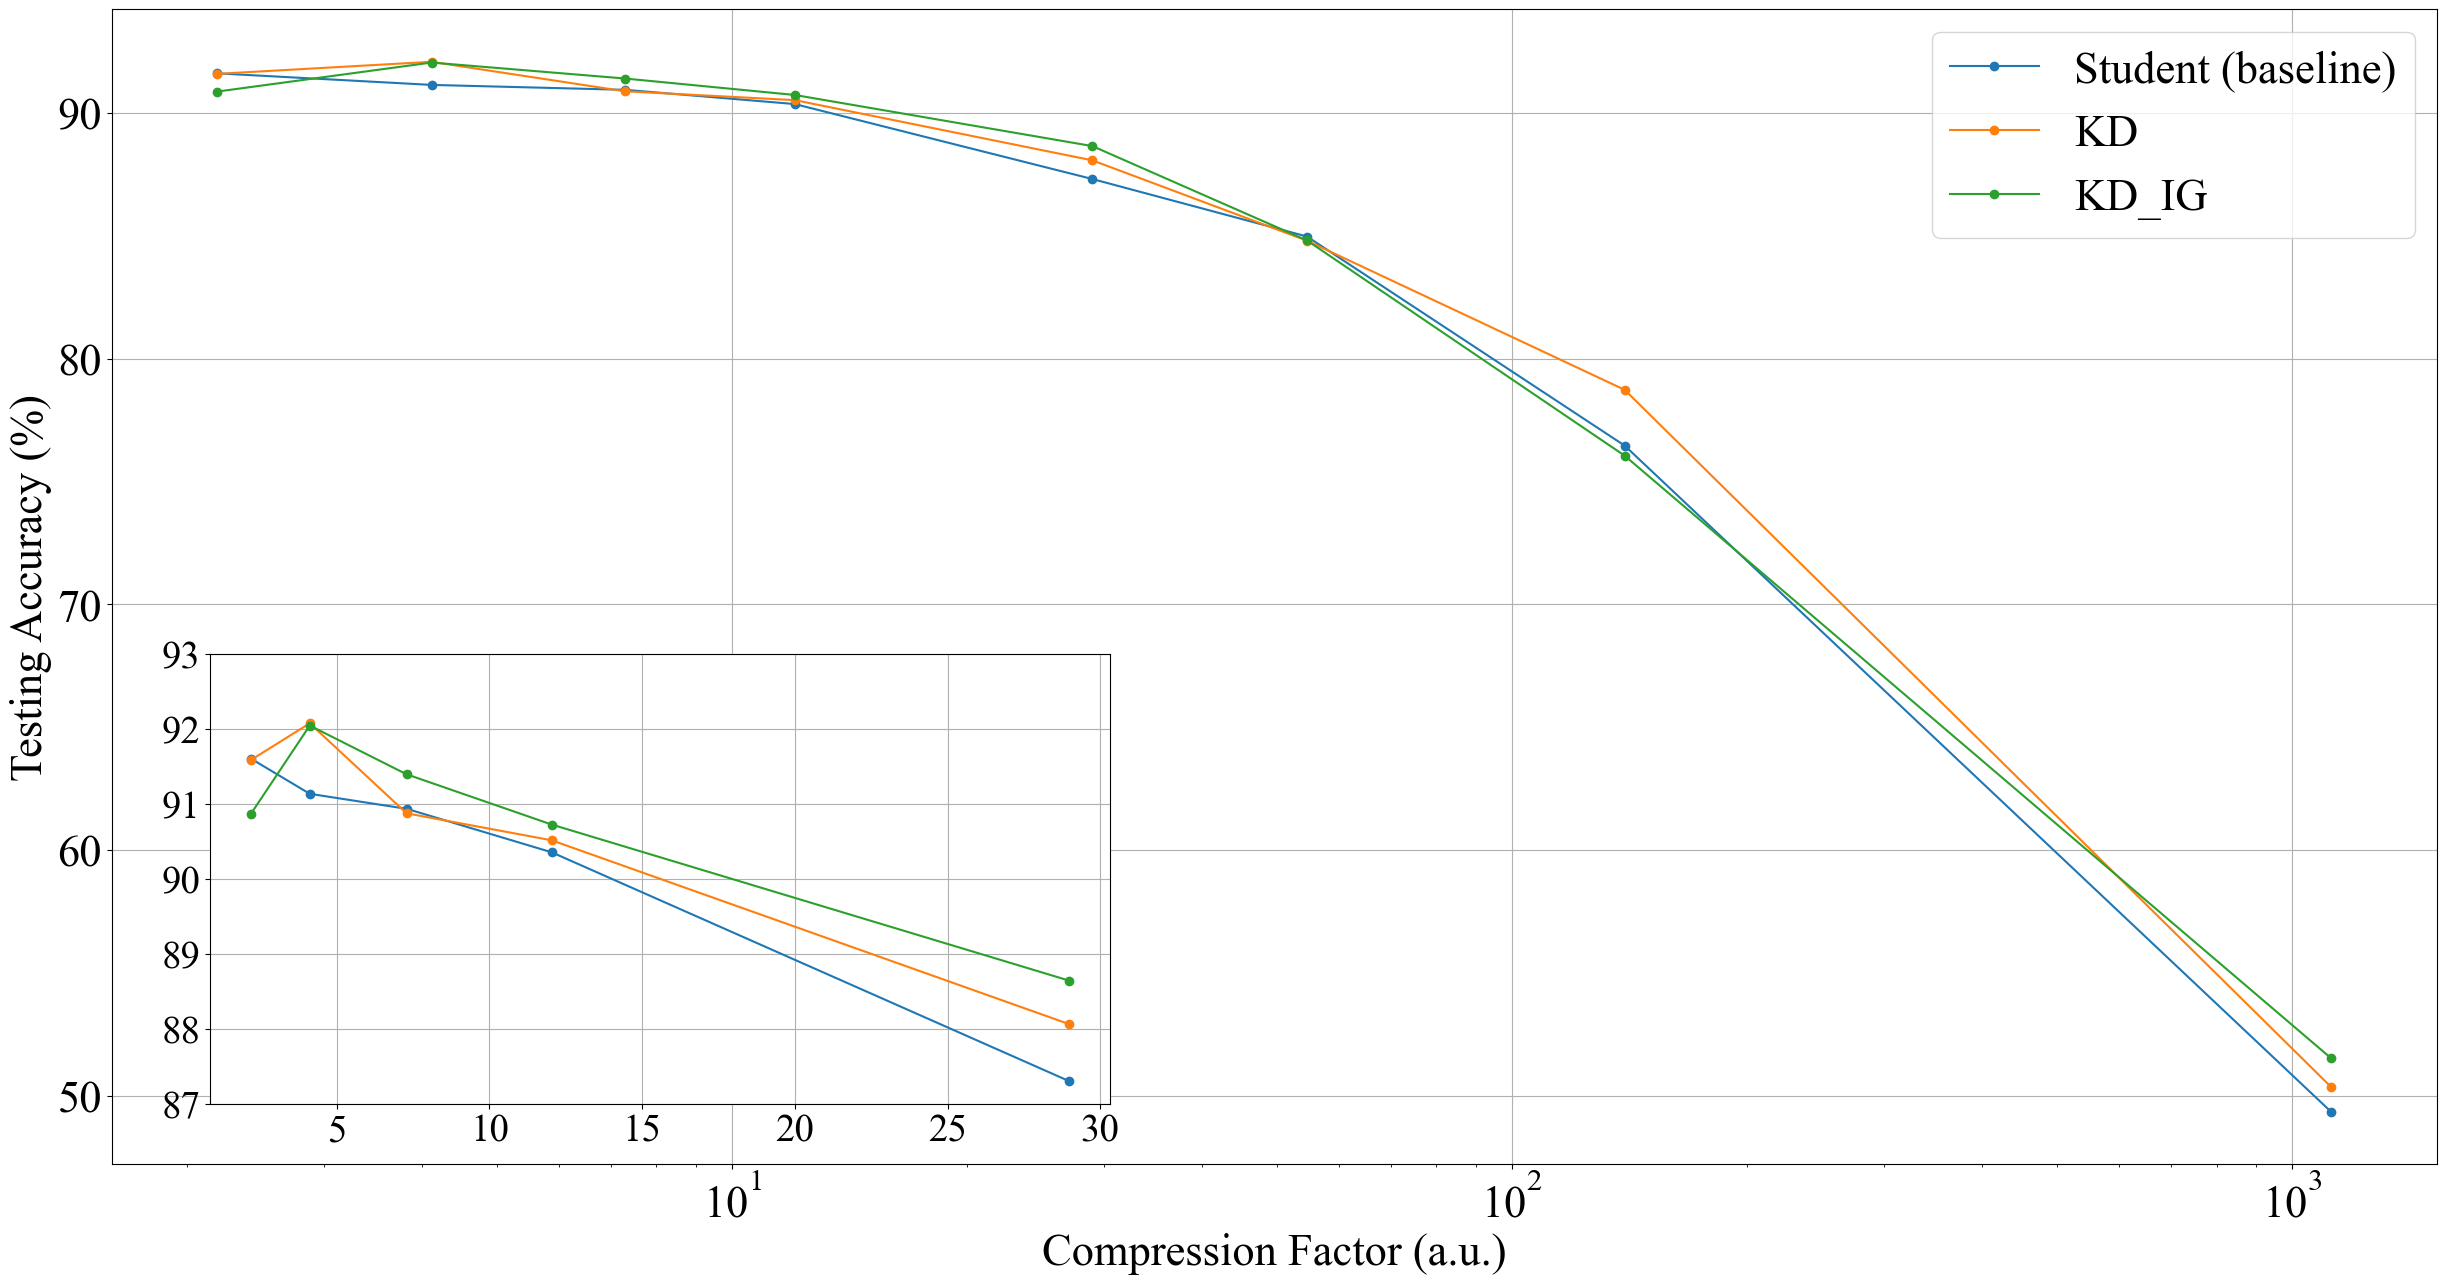

In [26]:
# Data for the main plot
compression_factors_main = [2.19, 4.12, 7.29, 12.04, 28.97, 54.59, 139.43, 1121.71]
student_baseline_main = [91.61, 91.14, 90.94, 90.36, 87.31, 84.97, 76.46, 49.35]
kd_baseline_main = [91.59, 92.08, 90.88, 90.52, 88.07, 84.80, 78.73, 50.36]
kd_ig_pre_trained_true_main = [91.90, 91.85, 92.19, 90.66, 87.81, 84.68, 76.68, 48.82]
kd_ig_pre_trained_false_main = [90.87, 92.05, 91.40, 90.73, 88.65, 84.81, 76.05, 51.53]

# Data for the minimap
compression_factors_mini = [2.19, 4.12, 7.29, 12.04, 28.97]
student_baseline_mini = [91.61, 91.14, 90.94, 90.36, 87.31]
kd_baseline_mini = [91.59, 92.08, 90.88, 90.52, 88.07]
kd_ig_pre_trained_true_mini = [91.90, 91.85, 92.19, 90.66, 87.81]
kd_ig_pre_trained_false_mini = [90.87, 92.05, 91.40, 90.73, 88.65]

# Main figure setup
plt.figure(figsize=(30, 15))  # Adjusted for general use, scale up if needed
plt.rcParams['font.size'] = 32  # You can adjust the size as needed
main_ax = plt.gca()
main_ax.plot(compression_factors_main, student_baseline_main, marker='o', label='Student (baseline)')
main_ax.plot(compression_factors_main, kd_baseline_main, marker='o', label='KD')
# main_ax.plot(compression_factors_main, kd_ig_pre_trained_true_main, marker='o', label='KD_IG$_{Pretrained=True}$')
main_ax.plot(compression_factors_main, kd_ig_pre_trained_false_main, marker='o', label='KD_IG')
main_ax.set_xscale('log')
main_ax.set_xlabel('Compression Factor (a.u.)')
main_ax.set_ylabel('Testing Accuracy (%)')
# main_ax.set_title('Delta Accuracy vs Compression Factor')
main_ax.grid(True)
main_ax.legend(loc='upper right')

# Inset / Minimap
inset_ax = plt.axes([0.1577, 0.15, 0.3, 0.3])  # Example placement: top right corner of main plot
for data in [student_baseline_mini, kd_baseline_mini,kd_ig_pre_trained_false_mini]:
    inset_ax.plot(compression_factors_mini, data, marker='o')
# inset_ax.set_xscale('log')
# inset_ax.set_title('Detailed View of Lower Compression Factors')
inset_ax.grid(True)

# Optionally, customize the tick labels for clarity
inset_ax.tick_params(axis='x', which='major', labelsize=28)
inset_ax.tick_params(axis='y', which='major', labelsize=28)
inset_ax.set_yticks([87, 88,89,90,91,92,93])

plt.savefig("Hernandez2024_acc_vs_cf_inset.pdf")
plt.show()
